In [1]:
import sys
sys.path.insert(1, "Z:/grodriguez/CardiacOCT/code/utils")
import numpy as np
import base64
from matplotlib.colors import ListedColormap
import SimpleITK as sitk
import math
import matplotlib.pyplot as plt

In [2]:
golden = b'AAAABQEACQEADQEADwEAEQIAEgIAFAIAFgIAGAMAGgMAGwMAHQMAHgMAIAQAIQQAIwQAJgQAJwUAKQUAKgUALAUALQYALwYAMAYAMwcBN' \
            b'QgBNggBOAkBOQoBOwoBPAsBPgwBQA0BQg4BQw4BRA8BRhABRxEBSREBShIBTBMBThQBUBUBURYBUhcBVBgBVRkBVxkBWBoBWhsBXBwCXh' \
            b'0CXx0CYB4CYh8CYyACZCECZiMCZyQCaSUCayYCbCcCbSgCbykCcCoCcisCcywCdC0Cdi4CeC8CejACezECfDMCfTQCfzUCgTYCgjcDgzg' \
            b'DhDkDhToDhzsDiTwDij0Diz4EjEAEjUEEj0IEkEMEkUQEkkUElEYFlkgFl0kFmEkFmUoFm0wFnE0GnU4GnlAGn1EGoVIGo1MHpFQIpVUI' \
            b'plcIp1gJqFoJqFwJqV0Jql8Kq2AKq2IKrGMLrWQLrmULr2cMr2kMsGsMsmwNs20Ns28NtHANtXIOtnMOt3QPt3YPuHcPunoQu3sQu3sQv' \
            b'HwRvX4Rvn8Sv4ASwIESwYITwoQUw4UUw4YVxIgWxYkWx4oXyIsYyIwYyY0Yyo8Zy5AZy5EZzZIazpMbz5Yb0Jcc0Zgc0pkd05oe1Jsf1Z' \
            b'0g1Z4g1p8h16Ai2KEj2KMl2aQm2qYn26co3Kgp3qop36sq4Kwr4a0s4a4t4rAu47Iv5LMw5bQx5bUy5rYz57g06Lk16bo36rs567w6674' \
            b'87L8+7MFA7MJC7cNF7cRG7cVI7sdL7shM78lP78pR78tT8MxV8M5X8c9Y8dFa8dJc8tNf8tRh89Vj89Zl89dn9Nlp9Nls9Npv9Npx9dt0' \
            b'9d139d569d599t+A9uCC9uGE9+KI9+KL9+KN9+OQ+OST+eSW+eWZ+eab+uee+uih+uij+umn++uq++ys++yv/O2z/O20/O62/O+5/O+7/' \
            b'PC+/PDB/PHD/PLG/PLI/PPK/PPN/PTP/PTR/PXU/PbW/PbY/Pfb/Pje/Png/Prj/Prl/Prn/Pvq/Pzt'

array = [tuple(row) for row in np.frombuffer(base64.b64decode(golden), dtype=np.ubyte).reshape((256, 3))]
colormap = ListedColormap(array)


In [3]:
array

[(0, 0, 0),
 (5, 1, 0),
 (9, 1, 0),
 (13, 1, 0),
 (15, 1, 0),
 (17, 2, 0),
 (18, 2, 0),
 (20, 2, 0),
 (22, 2, 0),
 (24, 3, 0),
 (26, 3, 0),
 (27, 3, 0),
 (29, 3, 0),
 (30, 3, 0),
 (32, 4, 0),
 (33, 4, 0),
 (35, 4, 0),
 (38, 4, 0),
 (39, 5, 0),
 (41, 5, 0),
 (42, 5, 0),
 (44, 5, 0),
 (45, 6, 0),
 (47, 6, 0),
 (48, 6, 0),
 (51, 7, 1),
 (53, 8, 1),
 (54, 8, 1),
 (56, 9, 1),
 (57, 10, 1),
 (59, 10, 1),
 (60, 11, 1),
 (62, 12, 1),
 (64, 13, 1),
 (66, 14, 1),
 (67, 14, 1),
 (68, 15, 1),
 (70, 16, 1),
 (71, 17, 1),
 (73, 17, 1),
 (74, 18, 1),
 (76, 19, 1),
 (78, 20, 1),
 (80, 21, 1),
 (81, 22, 1),
 (82, 23, 1),
 (84, 24, 1),
 (85, 25, 1),
 (87, 25, 1),
 (88, 26, 1),
 (90, 27, 1),
 (92, 28, 2),
 (94, 29, 2),
 (95, 29, 2),
 (96, 30, 2),
 (98, 31, 2),
 (99, 32, 2),
 (100, 33, 2),
 (102, 35, 2),
 (103, 36, 2),
 (105, 37, 2),
 (107, 38, 2),
 (108, 39, 2),
 (109, 40, 2),
 (111, 41, 2),
 (112, 42, 2),
 (114, 43, 2),
 (115, 44, 2),
 (116, 45, 2),
 (118, 46, 2),
 (120, 47, 2),
 (122, 48, 2),
 (123, 49

In [4]:
rgb_dict = {}
for value in range(len(array)):
    rgb_dict[array[value]] = value

In [5]:
rgb_dict

{(0, 0, 0): 0,
 (5, 1, 0): 1,
 (9, 1, 0): 2,
 (13, 1, 0): 3,
 (15, 1, 0): 4,
 (17, 2, 0): 5,
 (18, 2, 0): 6,
 (20, 2, 0): 7,
 (22, 2, 0): 8,
 (24, 3, 0): 9,
 (26, 3, 0): 10,
 (27, 3, 0): 11,
 (29, 3, 0): 12,
 (30, 3, 0): 13,
 (32, 4, 0): 14,
 (33, 4, 0): 15,
 (35, 4, 0): 16,
 (38, 4, 0): 17,
 (39, 5, 0): 18,
 (41, 5, 0): 19,
 (42, 5, 0): 20,
 (44, 5, 0): 21,
 (45, 6, 0): 22,
 (47, 6, 0): 23,
 (48, 6, 0): 24,
 (51, 7, 1): 25,
 (53, 8, 1): 26,
 (54, 8, 1): 27,
 (56, 9, 1): 28,
 (57, 10, 1): 29,
 (59, 10, 1): 30,
 (60, 11, 1): 31,
 (62, 12, 1): 32,
 (64, 13, 1): 33,
 (66, 14, 1): 34,
 (67, 14, 1): 35,
 (68, 15, 1): 36,
 (70, 16, 1): 37,
 (71, 17, 1): 38,
 (73, 17, 1): 39,
 (74, 18, 1): 40,
 (76, 19, 1): 41,
 (78, 20, 1): 42,
 (80, 21, 1): 43,
 (81, 22, 1): 44,
 (82, 23, 1): 45,
 (84, 24, 1): 46,
 (85, 25, 1): 47,
 (87, 25, 1): 48,
 (88, 26, 1): 49,
 (90, 27, 1): 50,
 (92, 28, 2): 51,
 (94, 29, 2): 52,
 (95, 29, 2): 53,
 (96, 30, 2): 54,
 (98, 31, 2): 55,
 (99, 32, 2): 56,
 (100, 33, 2): 5

In [6]:
img = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\DICOM\NLD-RADB-0080-MO1.dcm')
img_data = sitk.GetArrayFromImage(img)

In [7]:
frame = img_data[120,:,:,:]

In [13]:
list_rgb = []

for i in range(frame.shape[0]):
     for j in range(frame.shape[1]):

          rgb_value = tuple(frame[i, j])
          list_rgb.append(rgb_value)
     
#list_rgb = set(list_rgb)
#print(list_rgb)

In [14]:
gray_image = np.zeros(frame.shape[:2], dtype=np.uint8) 
duplicates = []
for i in range(frame.shape[0]):
     for j in range(frame.shape[1]):

          rgb_value = tuple(frame[i, j])

          if rgb_value not in array:
               #print('RGB value {} not mapped'.format(rgb_value))
               duplicates.append(rgb_value)
               min_dist = float('inf')
               closest_rgb = None

               for rgb_orig in array:
                    dist = math.dist(rgb_value, rgb_orig)
                    
                    if dist < min_dist:
                         min_dist = dist
                         closest_rgb = rgb_orig

               rgb_value = closest_rgb

          
               #print('Interpolated {} to {}'.format(rgb_value, closest_rgb))
               #print('\n')


          gray_value = rgb_dict[rgb_value]
          gray_image[i, j] = gray_value

duplicates = set(duplicates)
print(len(duplicates))

66


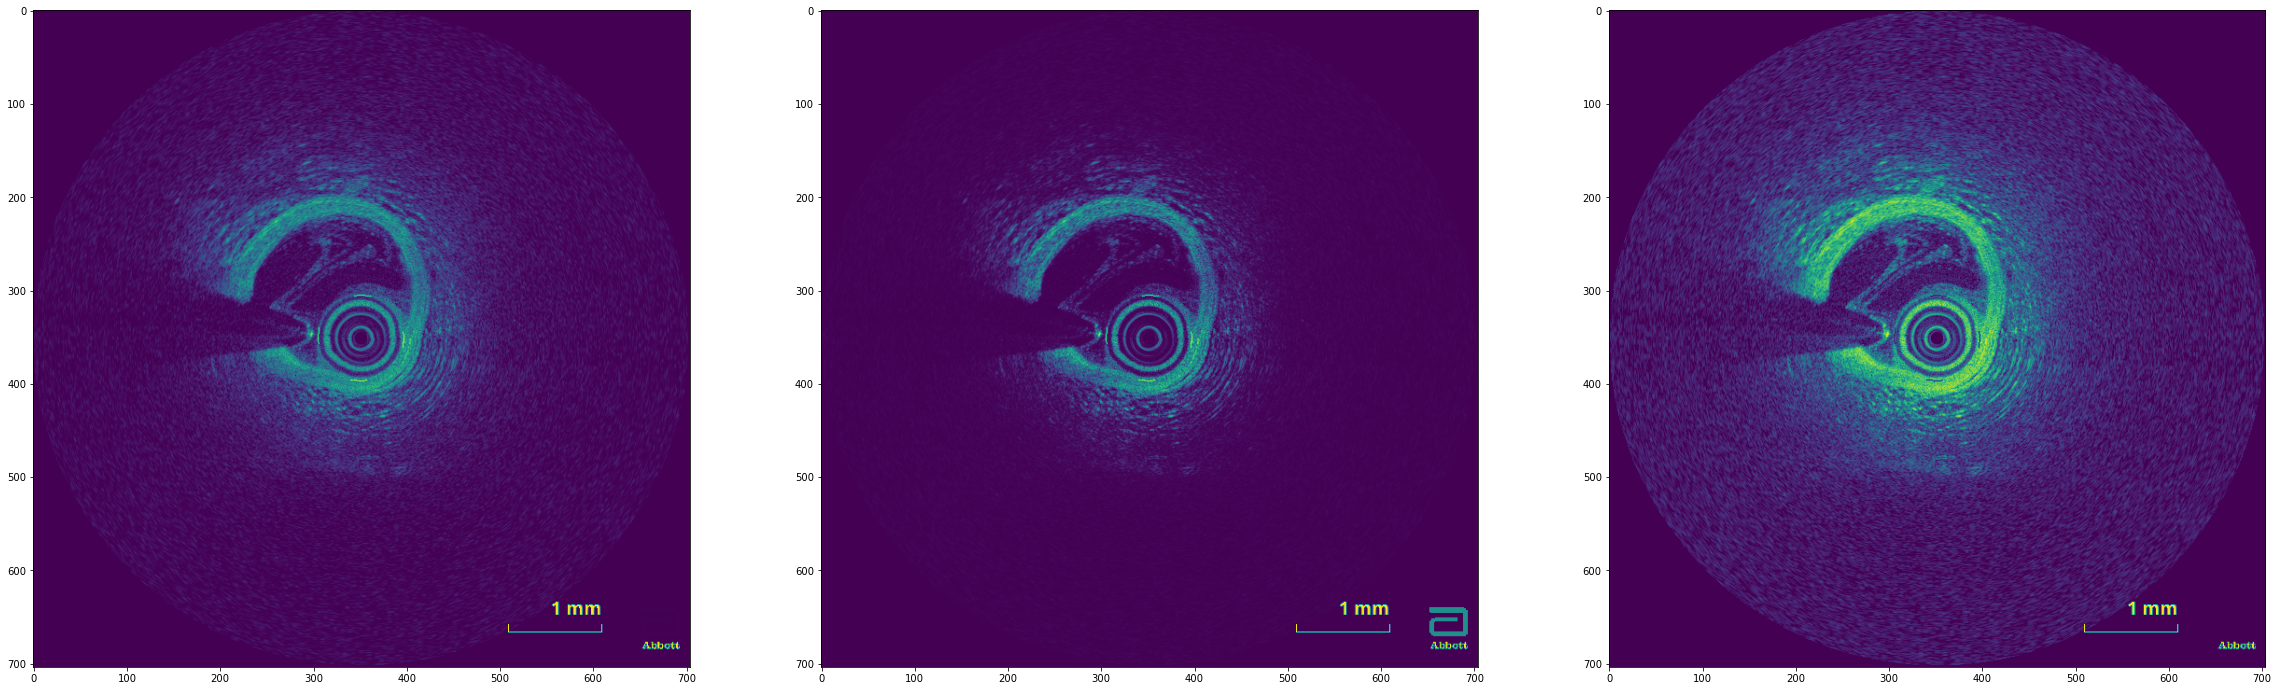

In [42]:
fig, axes = plt.subplots(1,3, figsize=(40,40))
axes[0].imshow(gray_image)
axes[1].imshow(img_data[0,:,:,1])
axes[2].imshow(img_data[0,:,:,0])